In [63]:
import torch
import numpy as np
import torchvision
import pandas as pd
from PIL import Image
import torch.nn as nn
from pathlib import Path
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Read csv

In [64]:
#read the csv
#column Breed shows the y with the image name
data_csv = pd.read_csv('dataset_CV.csv')
df

,0,1
0,"[[[tensor(0.0017), tensor(0.1119), tensor(0.19...",tensor(0)
1,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
2,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
3,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
4,"[[[tensor(0.3598), tensor(0.3357), tensor(0.32...",tensor(0)
...,...,...
4139,"[[[tensor(-0.7342), tensor(-0.2144), tensor(-0...",tensor(4)
4140,"[[[tensor(-0.4639), tensor(-0.9042), tensor(-0...",tensor(4)
4141,"[[[tensor(-0.3413), tensor(-0.3747), tensor(-0...",tensor(4)
4142,"[[[tensor(0.6822), tensor(0.3660), tensor(0.29...",tensor(4)


# Preprocessing

In [65]:
# setting transforms to use on images
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
    transforms.Resize((28, 28)),
    ])

In [66]:
location = r"dog_breed_photos"

# prepare the image by setting to RGB and applying the transforms (return tensor)
def create_data(path):
    image = Image.open(Path(location) / path).convert('RGB')
    img = trans(image)
    image.close()
    return img

# prepare the label and turn to tensor
def create_label(label):
    if label == "AMERICAN STAFFORDSHIRE BULL TERRIER":
        y = 0
    elif label == "BULL ARAB":
        y = 1
    elif label == "GERMAN SHEPHERD":
        y = 2
    elif label == "SIBERIAN HUSKY":
        y = 3
    elif label == "BORDER COLLIE":
        y = 4
    return torch.tensor(y)
    

data_csv['data'] = data_csv['Image'].apply(lambda image: create_data(image))
data_csv['class'] = data_csv['Breed'].apply(lambda breed: create_label(breed))
data_csv

,DogId,Breed,Image,ImageNumber,data,class
0,9473,AMERICAN STAFFORDSHIRE BULL TERRIER,89f3c062-8928-487b-b7c0-8ab50f44641e.jpg,1,"[[[tensor(0.0017), tensor(0.1119), tensor(0.19...",tensor(0)
1,9473,AMERICAN STAFFORDSHIRE BULL TERRIER,e9e33b00-5ec4-4742-ac02-b9ee2a88314f.jpg,2,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
2,9473,AMERICAN STAFFORDSHIRE BULL TERRIER,2a81e50c-efdb-4e98-9220-d6945753731d.jpg,3,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
3,9473,AMERICAN STAFFORDSHIRE BULL TERRIER,0609e883-2c18-40b2-a4a5-8a90754a94f6.jpg,4,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
4,9548,AMERICAN STAFFORDSHIRE BULL TERRIER,10fb3092-842a-466b-a3db-3c88f624c6f4.jpg,1,"[[[tensor(0.3598), tensor(0.3357), tensor(0.32...",tensor(0)
...,...,...,...,...,...,...
4139,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5,"[[[tensor(-0.7342), tensor(-0.2144), tensor(-0...",tensor(4)
4140,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6,"[[[tensor(-0.4639), tensor(-0.9042), tensor(-0...",tensor(4)
4141,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7,"[[[tensor(-0.3413), tensor(-0.3747), tensor(-0...",tensor(4)
4142,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8,"[[[tensor(0.6822), tensor(0.3660), tensor(0.29...",tensor(4)


In [67]:
#create dataframe for loader
df = pd.concat([data_csv['data'], data_csv['class']], ignore_index=True, axis = 1)
df

,0,1
0,"[[[tensor(0.0017), tensor(0.1119), tensor(0.19...",tensor(0)
1,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
2,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
3,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",tensor(0)
4,"[[[tensor(0.3598), tensor(0.3357), tensor(0.32...",tensor(0)
...,...,...
4139,"[[[tensor(-0.7342), tensor(-0.2144), tensor(-0...",tensor(4)
4140,"[[[tensor(-0.4639), tensor(-0.9042), tensor(-0...",tensor(4)
4141,"[[[tensor(-0.3413), tensor(-0.3747), tensor(-0...",tensor(4)
4142,"[[[tensor(0.6822), tensor(0.3660), tensor(0.29...",tensor(4)


In [68]:
# transform to campatible datatype
df_dict = df.to_dict('index')
print(type(df_dict))
df_dict

<class 'dict'>


{0: {0: tensor([[[ 0.0017,  0.1119,  0.1949,  ...,  0.6658,  0.7559,  0.6438],
           [-0.0459,  0.0305,  0.0569,  ...,  0.7157,  0.7097,  0.6480],
           [-0.5783, -0.2990, -0.4895,  ...,  0.8951,  0.8667,  0.8487],
           ...,
           [-0.5683,  0.5240, -0.7333,  ...,  0.2603,  0.3146,  0.3398],
           [-0.2989, -0.0688, -0.7804,  ...,  0.1999,  0.2961,  0.3542],
           [-0.7176, -0.7647, -0.7882,  ...,  0.2161,  0.2695,  0.2888]],
  
          [[-0.1473, -0.0371,  0.0929,  ...,  0.5482,  0.6304,  0.5104],
           [-0.2440, -0.1106, -0.0421,  ...,  0.6137,  0.5744,  0.5225],
           [-0.6480, -0.4373, -0.5999,  ...,  0.8382,  0.8196,  0.7889],
           ...,
           [-0.1711,  0.4850, -0.6314,  ...,  0.1710,  0.2204,  0.2456],
           [-0.2910, -0.1426, -0.7255,  ...,  0.1058,  0.2020,  0.2601],
           [-0.6549, -0.7725, -0.7255,  ...,  0.1073,  0.1606,  0.1790]],
  
          [[-0.2806, -0.1470, -0.0326,  ...,  0.3207,  0.4265,  0.3045],
     

# Train - Test Split and Dataloader

In [69]:
# train, test split
train, test = train_test_split(df_dict, test_size = 0.25, random_state=42, shuffle = True)
train

[{0: tensor([[[-0.5233, -0.5477, -0.7089,  ..., -0.1600, -0.2260, -0.3908],
           [-0.6958, -0.4357, -0.4896,  ..., -0.2525, -0.2338, -0.2854],
           [-0.5942, -0.5854, -0.5481,  ...,  0.0175, -0.3699, -0.0499],
           ...,
           [ 0.9333,  0.7246,  0.6462,  ...,  0.8154,  0.6202,  0.5295],
           [ 0.9344,  0.7703,  0.7993,  ...,  0.7810,  0.5700,  0.1998],
           [ 0.9019,  0.9723,  0.8926,  ...,  0.7816,  0.8356,  0.8589]],
  
          [[-0.3664, -0.3673, -0.5240,  ..., -0.1055,  0.0014, -0.1283],
           [-0.4840, -0.1858, -0.3046,  ..., -0.0859, -0.0455, -0.0344],
           [-0.3762, -0.3019, -0.4378,  ...,  0.0946, -0.1926,  0.1909],
           ...,
           [ 0.9110,  0.7011,  0.6148,  ...,  0.7890,  0.6123,  0.5295],
           [ 0.9265,  0.7202,  0.7707,  ...,  0.7706,  0.5386,  0.1920],
           [ 0.8722,  0.9471,  0.8691,  ...,  0.7593,  0.8120,  0.8275]],
  
          [[-0.0762, -0.0379, -0.2400,  ...,  0.1480,  0.3308,  0.1914],
        

In [70]:
#dataloader
train_loader = torch.utils.data.DataLoader(train, batch_size= 2, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size= 1, shuffle=True)

# Define cnn model

In [71]:
#Define model

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Conv2d(3, 6, (3,3)),
        nn.ReLU(),
        nn.Conv2d(6, 12, (3,3), padding=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(8112, 5),
        )

    def forward(self, x):
        return self.model(x)


model = Net()
print(net)

Net(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=8112, out_features=5, bias=True)
  )
)


In [72]:
# loss function and optimezer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training

In [73]:
max_epochs = 30
train_losses = []
for epoch in range(max_epochs):  
    for i, data in enumerate(train_loader):
        
        inputs = data[0] 
        labels = data[1]
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        
    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch: {epoch + 1}/{max_epochs} Loss: {train_loss :.5f}')
    train_losses.append(train_loss)


print('Finished Training')

Epoch: 1/30 Loss: 1.60917
Epoch: 2/30 Loss: 1.60917
Epoch: 3/30 Loss: 1.60917
Epoch: 4/30 Loss: 1.60917
Epoch: 5/30 Loss: 1.60917
Epoch: 6/30 Loss: 1.60917
Epoch: 7/30 Loss: 1.60917
Epoch: 8/30 Loss: 1.60917
Epoch: 9/30 Loss: 1.60917
Epoch: 10/30 Loss: 1.60917
Epoch: 11/30 Loss: 1.60917
Epoch: 12/30 Loss: 1.60917
Epoch: 13/30 Loss: 1.60917
Epoch: 14/30 Loss: 1.60917
Epoch: 15/30 Loss: 1.60917
Epoch: 16/30 Loss: 1.60917
Epoch: 17/30 Loss: 1.60917
Epoch: 18/30 Loss: 1.60917
Epoch: 19/30 Loss: 1.60917
Epoch: 20/30 Loss: 1.60917
Epoch: 21/30 Loss: 1.60917
Epoch: 22/30 Loss: 1.60917
Epoch: 23/30 Loss: 1.60917
Epoch: 24/30 Loss: 1.60917
Epoch: 25/30 Loss: 1.60917
Epoch: 26/30 Loss: 1.60917
Epoch: 27/30 Loss: 1.60917
Epoch: 28/30 Loss: 1.60917
Epoch: 29/30 Loss: 1.60917
Epoch: 30/30 Loss: 1.60917
Finished Training


# Evaluating

In [74]:
#eval
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        
        inputs = data[0] 
        labels = data[1]
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 19.111969111969113 %


# Plotting

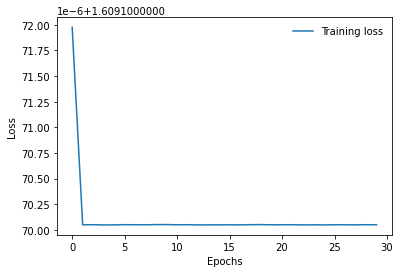

In [75]:
#visualize
plt.plot(train_losses, label='Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [76]:
#plot muss noch angepasst werden
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = df[42]
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

KeyError: 42